In [ ]:
!pip install transformers

In [ ]:
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import torch
from PIL import Image

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

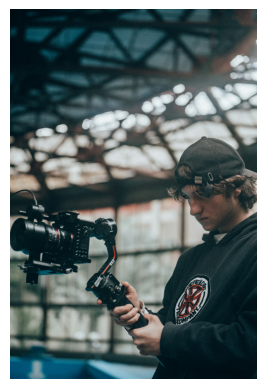

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


Generated Caption: a man holding a camera in front of a camera
--------------------------------------------------


In [ ]:
import torch
from PIL import Image
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
import matplotlib.pyplot as plt

model = VisionEncoderDecoderModel.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
feature_extractor = ViTFeatureExtractor.from_pretrained("nlpconnect/vit-gpt2-image-captioning")
tokenizer = AutoTokenizer.from_pretrained("nlpconnect/vit-gpt2-image-captioning")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

max_length = 16
num_beams = 4
gen_kwargs = {"max_length": max_length, "num_beams": num_beams}

def predict_step(image_paths):
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        # Display the image
        plt.imshow(i_image)
        plt.axis("off")
        plt.show()

        images = [i_image]
        pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(device)

        output_ids = model.generate(pixel_values, **gen_kwargs)

        preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        preds = [pred.strip() for pred in preds]

        # Display the generated caption
        print("Generated Caption:", preds[0])
        print("-" * 50)

# Example usage
predict_step(['/content/camera_man.jpg'])


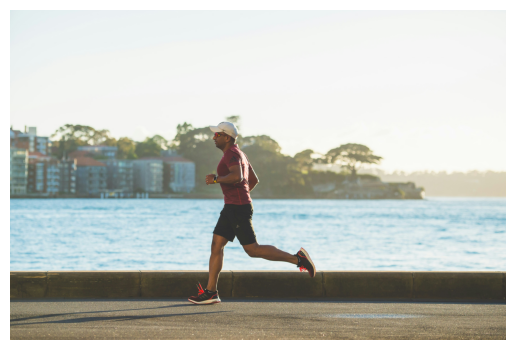

Generated Caption: a man walking on a sidewalk near a body of water
--------------------------------------------------


In [ ]:
def predict_step(image_paths):
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        # Display the image
        plt.imshow(i_image)
        plt.axis("off")
        plt.show()

        images = [i_image]
        pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(device)

        output_ids = model.generate(pixel_values, **gen_kwargs)

        preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        preds = [pred.strip() for pred in preds]

        # Display the generated caption
        print("Generated Caption:", preds[0])
        print("-" * 50)

# Example usage
predict_step(['/content/man_running.jpg'])


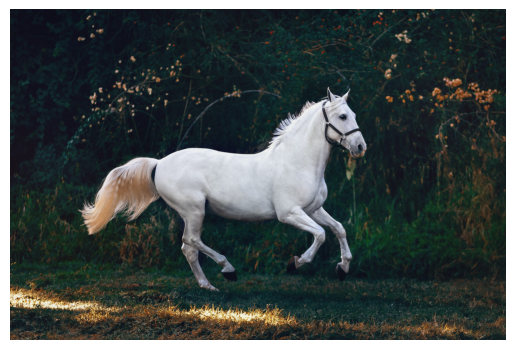

Generated Caption: a white horse standing on top of a lush green field
--------------------------------------------------


In [ ]:
def predict_step(image_paths):
    for image_path in image_paths:
        i_image = Image.open(image_path)
        if i_image.mode != "RGB":
            i_image = i_image.convert(mode="RGB")

        # Display the image
        plt.imshow(i_image)
        plt.axis("off")
        plt.show()

        images = [i_image]
        pixel_values = feature_extractor(images=images, return_tensors="pt").pixel_values
        pixel_values = pixel_values.to(device)

        output_ids = model.generate(pixel_values, **gen_kwargs)

        preds = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
        preds = [pred.strip() for pred in preds]

        # Display the generated caption
        print("Generated Caption:", preds[0])
        print("-" * 50)

# Example usage
predict_step(['/content/horse.jpg'])